<a href="https://colab.research.google.com/github/SunaUezuri/ElectricalEnergyConsumption/blob/main/ElectricalEnergyConsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Packages Imports**

In [3]:
import pandas as pd

# **Creation of the Dataframe**

In [4]:
# sep ----> Standard: ','
# low_memory ----> Standard: True -----> False | used when the archive has high data

df =  pd.read_csv('/content/household_power_consumption 2.txt', sep=';', low_memory=False)

FileNotFoundError: [Errno 2] No such file or directory: '/content/household_power_consumption 2.txt'

# **Exploratory Data Analysis**

In [5]:
df.shape
print(f'The dataframe has {df.shape[0]} registries and {df.shape[1]} attributes')

NameError: name 'df' is not defined

In [6]:
# Showing the first 10 registries
df.head(10)

NameError: name 'df' is not defined

## **Global_active_power and Global_reactive_power**

**Global_active_power** = É a potência que é consumida e transformada em trabalho útil como:

*   Iluminar uma lâmpada
*   Aquecer uma resistência
*   Girar um motor de máquina

-------


**Global_reactive_power** = Ela não realiza trabalho útil diretamente, É a potência que oscila entre a fonte e a carga devido a campos magnéticos (indutores, motores, transformadores) ou elétricos (capacitores), Embora não produza trabalho, é necessária para manter o funcionamento de dispositivos eletromagnéticos (motores, bobinas, transformadores).





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586855 entries, 0 to 586854
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   586855 non-null  object 
 1   Time                   586855 non-null  object 
 2   Global_active_power    586855 non-null  object 
 3   Global_reactive_power  586854 non-null  object 
 4   Voltage                586854 non-null  object 
 5   Global_intensity       586854 non-null  object 
 6   Sub_metering_1         586854 non-null  object 
 7   Sub_metering_2         586854 non-null  object 
 8   Sub_metering_3         582918 non-null  float64
dtypes: float64(1), object(8)
memory usage: 40.3+ MB


In [ ]:
# Quantificar registros ausentes (NaN e/ou nulos)
df.isna().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,1
Voltage,1
Global_intensity,1
Sub_metering_1,1
Sub_metering_2,1
Sub_metering_3,3937


In [ ]:
perc = 100 * (25979 / df.shape[0])

print(f'O percentual de registros ausentes é de {perc:.3f}%')

O percentual de registros ausentes é de 4.427%


In [ ]:
# Isolando as colunas que não quero tornar em numéricos
colunas_excluir = ["Date", "Time"]

# Converter todas as outras colunas para numérico
for col in df.columns:
    if col not in colunas_excluir:
        df[col] = pd.to_numeric(df[col], errors="coerce")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586855 entries, 0 to 586854
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   586855 non-null  object 
 1   Time                   586855 non-null  object 
 2   Global_active_power    582919 non-null  float64
 3   Global_reactive_power  582918 non-null  float64
 4   Voltage                582918 non-null  float64
 5   Global_intensity       582918 non-null  float64
 6   Sub_metering_1         582918 non-null  float64
 7   Sub_metering_2         582918 non-null  float64
 8   Sub_metering_3         582918 non-null  float64
dtypes: float64(7), object(2)
memory usage: 40.3+ MB


In [ ]:
# Convertendo a coluna data para datetime
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y", errors="coerce")

In [ ]:
# Converter Time de string para timedelta
df["Time"] = pd.to_timedelta(df["Time"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586855 entries, 0 to 586854
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   Date                   586855 non-null  datetime64[ns] 
 1   Time                   586855 non-null  timedelta64[ns]
 2   Global_active_power    582919 non-null  float64        
 3   Global_reactive_power  582918 non-null  float64        
 4   Voltage                582918 non-null  float64        
 5   Global_intensity       582918 non-null  float64        
 6   Sub_metering_1         582918 non-null  float64        
 7   Sub_metering_2         582918 non-null  float64        
 8   Sub_metering_3         582918 non-null  float64        
dtypes: datetime64[ns](1), float64(7), timedelta64[ns](1)
memory usage: 40.3 MB


In [ ]:
# Criando a nova coluna com o dia da semana correspondente
df["Dia_Semana"] = df["Date"].dt.day_name()

In [ ]:
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Dia_Semana
0,2006-12-16,0 days 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Saturday
1,2006-12-16,0 days 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Saturday
2,2006-12-16,0 days 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Saturday
3,2006-12-16,0 days 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Saturday
4,2006-12-16,0 days 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Saturday
5,2006-12-16,0 days 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0,Saturday
6,2006-12-16,0 days 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0,Saturday
7,2006-12-16,0 days 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0,Saturday
8,2006-12-16,0 days 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0,Saturday
9,2006-12-16,0 days 17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0,Saturday


In [ ]:
# Excluir registros ausentes
df = df.dropna()

In [ ]:
# Quantificar registros ausentes (NaN e/ou nulos)
df.isna().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0
Dia_Semana,0


**Filtrando registros de 2007 e calculando a média de consumo diário**

In [ ]:
# Filtrar apenas o ano de 2007
df_2007 = df[df["Date"].dt.year == 2007]

In [ ]:
# Agrupar por dia e calcular a média diária
media_diaria = df_2007.groupby(df_2007["Date"].dt.date)["Global_active_power"].mean()

media_diaria

,Global_active_power
Date,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281
...,...
2007-12-27,1.758471
2007-12-28,2.161842
2007-12-29,2.290942


### **Criando gráficos**

Utilizando o Seaborn para ver a variação da coluna Global_active_power em um dia

In [ ]:
# imports
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dia_escolhido = pd.to_datetime("01/02/2007")

# Filtrar o DataFrame para esse dia
df_dia = df[df["Date"].dt.date == dia_escolhido.date()]

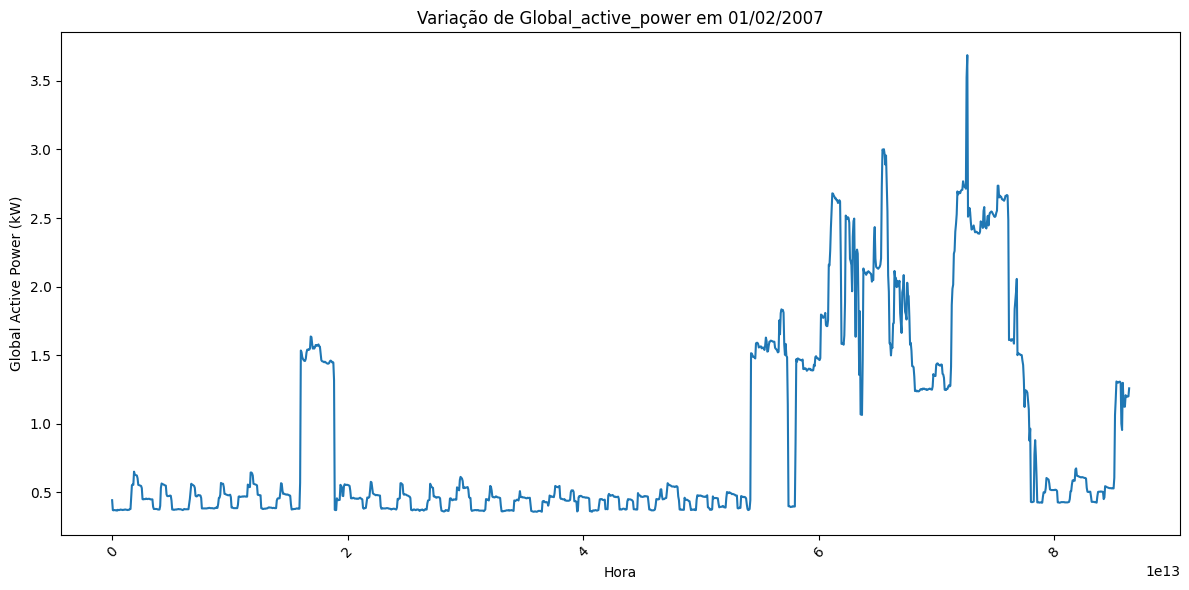

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_dia,
    x="Time",
    y="Global_active_power"
)

plt.xticks(rotation=45)  # Rotaciona os horários para melhor visualização
plt.title("Variação de Global_active_power em 01/02/2007")
plt.xlabel("Hora")
plt.ylabel("Global Active Power (kW)")
plt.tight_layout()
plt.show()

**Histograma de Voltage**

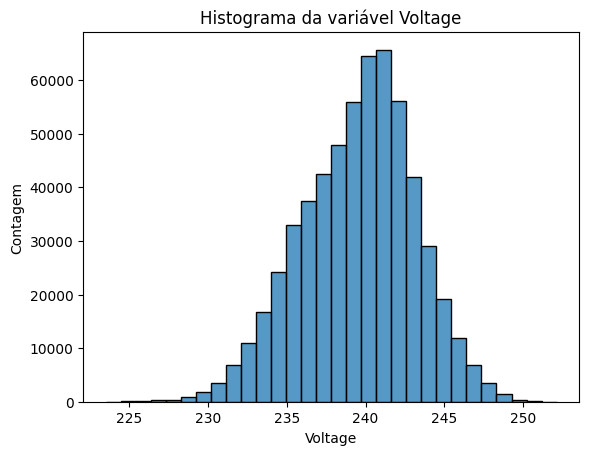

In [ ]:
# Plotando o histograma
sns.histplot(data=df, x="Voltage", bins=30, kde=False)  # bins ajusta a quantidade de barras
plt.title("Histograma da variável Voltage")
plt.xlabel("Voltage")
plt.ylabel("Contagem")
plt.show()

<Axes: xlabel='Voltage', ylabel='Count'>

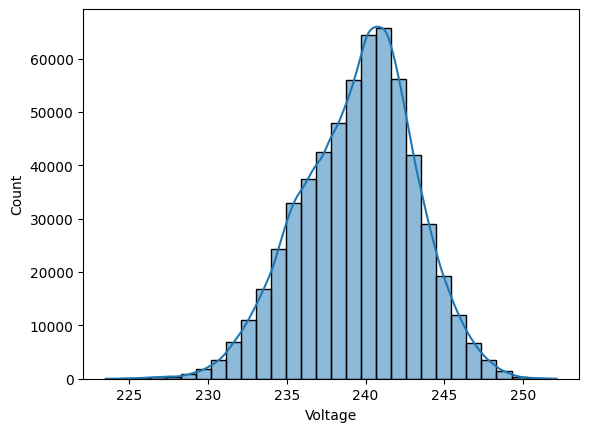

In [ ]:
sns.histplot(data=df, x="Voltage", bins=30, kde=True)

O histograma indica que a tensão (Voltage) se mantém muito estável em torno de 240 V, com pouca variação, o que é típico de medições residenciais ou industriais com boa regulação.

**Calculando a média mensal do período**

In [ ]:
media_mensal = df.groupby(df["Date"].dt.to_period("M"))["Global_active_power"].mean().reset_index()
media_mensal.rename(columns={"Global_active_power": "Media_Global_Active_Power"}, inplace=True)
print(media_mensal)

       Date  Media_Global_Active_Power
0   2006-12                   1.901295
1   2007-01                   1.546034
2   2007-02                   1.401084
3   2007-03                   1.318627
4   2007-04                   0.891189
5   2007-05                   0.985862
6   2007-06                   0.826814
7   2007-07                   0.667367
8   2007-08                   0.764186
9   2007-09                   0.969318
10  2007-10                   1.103911
11  2007-11                   1.294473
12  2007-12                   1.626474
13  2008-01                   1.448786


In [ ]:
# Encontrado o dia com maior consumo ativo
consumo_diario = df.groupby(df["Date"].dt.date)["Global_active_power"].sum()

In [ ]:
# Encontrando o dia com maior consumo
dia_max = consumo_diario.idxmax()
valor_max = consumo_diario.max()

print(f"O dia com maior consumo foi {dia_max} com {valor_max:.2f} kW")

O dia com maior consumo foi 2006-12-23 com 4773.39 kW


In [ ]:
# weekday(): segunda=0, domingo=6
media_consumo = df.groupby(df['Date'].dt.weekday >= 5)['Global_active_power'].mean()

# Renomear índice para facilitar interpretação
media_consumo.index = ['Dias de semana', 'Finais de semana']

media_consumo

,Global_active_power
Dias de semana,1.082506
Finais de semana,1.386314


É possível notar que há mais gasto de energia durante o final de semana, provavelmente devido a muitas pessoas ficarem em casa durante estes dias.

## Calculando a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity.

In [ ]:
# Calculando a correlação entre as variáveis
correlation_matrix = df[["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity"]].corr()

# Exibindo a matriz de correlação
print(correlation_matrix)

                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.261235 -0.360485   
Global_reactive_power             0.261235               1.000000 -0.112560   
Voltage                          -0.360485              -0.112560  1.000000   
Global_intensity                  0.999072               0.276290 -0.371411   

                       Global_intensity  
Global_active_power            0.999072  
Global_reactive_power          0.276290  
Voltage                       -0.371411  
Global_intensity               1.000000  


## Criando uma nova variável chamada Total_Sub_metering que some Sub_metering_1, Sub_metering_2 e Sub_metering_3

In [ ]:
# Criando a nova variável somando as colunas de sub-medição
df["Total_Sub_metering"] = df["Sub_metering_1"] + df["Sub_metering_2"] + df["Sub_metering_3"]

## Verificando se há algum mês em que Total_Sub_metering ultrapassa a média de Global_active_power.

In [ ]:
# Calcular a média mensal de Total_Sub_metering
media_mensal_sub = df.groupby(df["Date"].dt.to_period("M"))["Total_Sub_metering"].mean().reset_index()
media_mensal_sub.rename(columns={"Total_Sub_metering": "Media_Total_Sub_metering"}, inplace=True)

# Calcular a média mensal de Global_active_power (already calculated in media_mensal)
# media_mensal is already available from previous execution

# Combinar as duas médias mensais para comparação
comparacao_mensal = pd.merge(media_mensal, media_mensal_sub, on="Date")

# Verificar se em algum mês a média de Total_Sub_metering ultrapassa a média de Global_active_power
meses_ultrapassam = comparacao_mensal[comparacao_mensal["Media_Total_Sub_metering"] > comparacao_mensal["Media_Global_Active_Power"]]

if not meses_ultrapassam.empty:
    print("Meses em que a média de Total_Sub_metering ultrapassa a média de Global_active_power:")
    print(meses_ultrapassam)
else:
    print("Não há meses em que a média de Total_Sub_metering ultrapassa a média de Global_active_power.")

Meses em que a média de Total_Sub_metering ultrapassa a média de Global_active_power:
       Date  Media_Global_Active_Power  Media_Total_Sub_metering
0   2006-12                   1.901295                 10.873181
1   2007-01                   1.546034                 10.423518
2   2007-02                   1.401084                  9.486135
3   2007-03                   1.318627                 10.212863
4   2007-04                   0.891189                  6.839375
5   2007-05                   0.985862                  8.452442
6   2007-06                   0.826814                  7.379151
7   2007-07                   0.667367                  5.697724
8   2007-08                   0.764186                  6.979336
9   2007-09                   0.969318                  8.206236
10  2007-10                   1.103911                  8.674493
11  2007-11                   1.294473                  9.819413
12  2007-12                   1.626474                 11.636551
13  

## Gráfico de série temporal do Voltage para o ano de 2008.

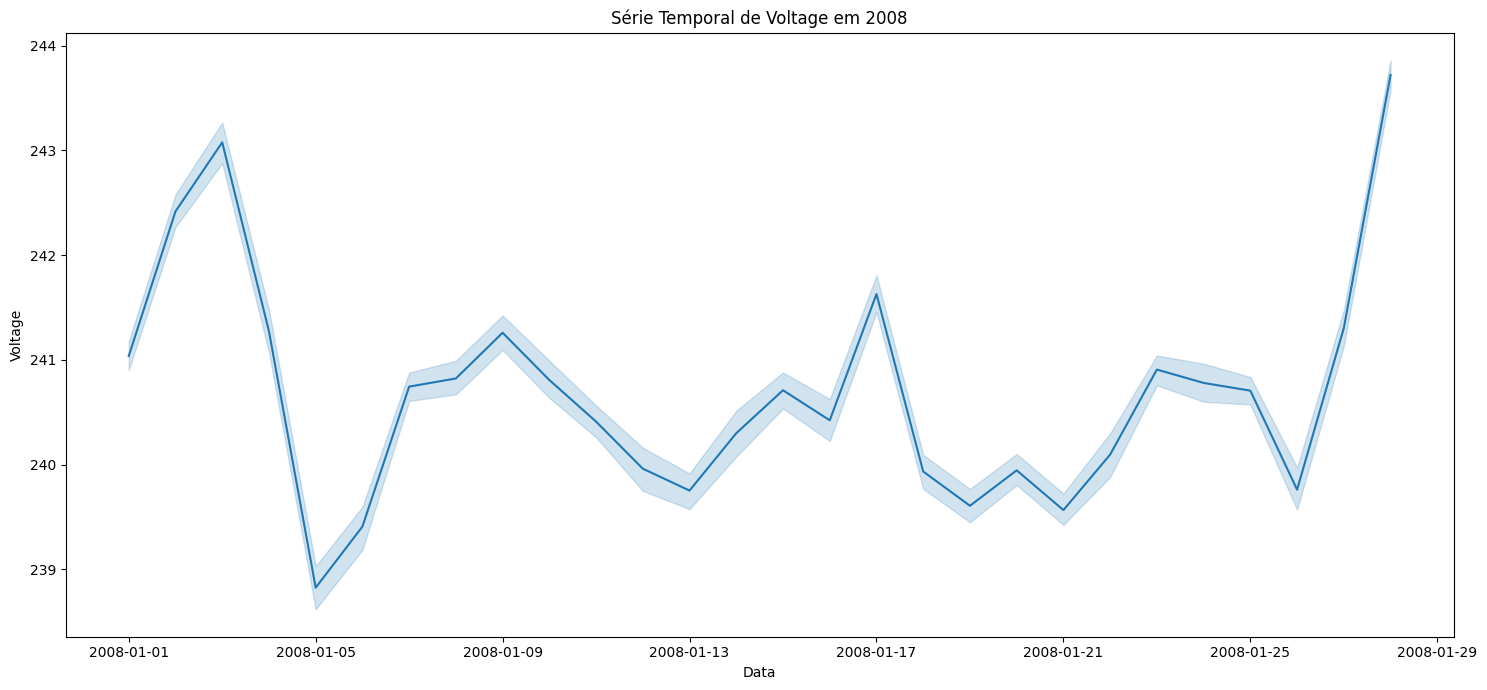

In [ ]:
# Filtrar o DataFrame para o ano de 2008
df_2008 = df[df["Date"].dt.year == 2008]

# Criar o gráfico de série temporal para Voltage em 2008
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_2008, x="Date", y="Voltage")
plt.title("Série Temporal de Voltage em 2008")
plt.xlabel("Data")
plt.ylabel("Voltage")
plt.tight_layout()
plt.show()

## Comparando o consumo entre os meses de verão e inverno (no hemisfério norte)

Média de Global_active_power no verão (Hemisfério Norte): 0.75 kW
Média de Global_active_power no inverno (Hemisfério Norte): 1.56 kW


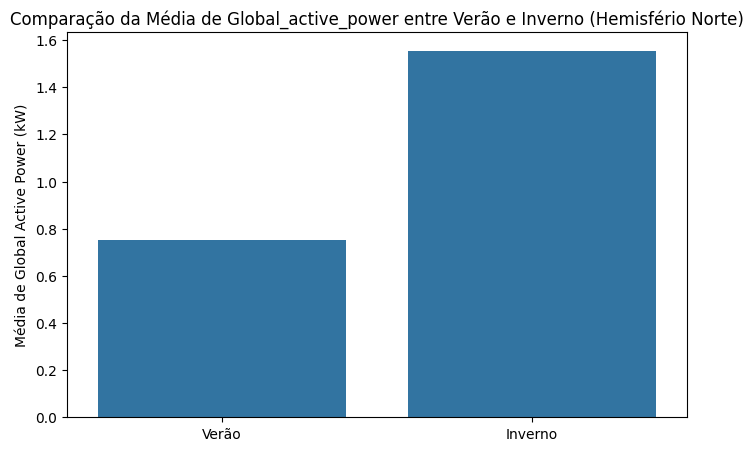

In [ ]:
# Define summer and winter months in the Northern Hemisphere
summer_months = [6, 7, 8]  # June, July, August
winter_months = [12, 1, 2] # December, January, February

# Filter data for summer and winter months
df_summer = df[df["Date"].dt.month.isin(summer_months)]
df_winter = df[df["Date"].dt.month.isin(winter_months)]

# Calculate the average Global_active_power for summer and winter
media_verao = df_summer["Global_active_power"].mean()
media_inverno = df_winter["Global_active_power"].mean()

print(f"Média de Global_active_power no verão (Hemisfério Norte): {media_verao:.2f} kW")
print(f"Média de Global_active_power no inverno (Hemisfério Norte): {media_inverno:.2f} kW")

# Optional: Create a bar plot to visualize the comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=["Verão", "Inverno"], y=[media_verao, media_inverno])
plt.title("Comparação da Média de Global_active_power entre Verão e Inverno (Hemisfério Norte)")
plt.ylabel("Média de Global Active Power (kW)")
plt.show()

## Aplicando uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa.

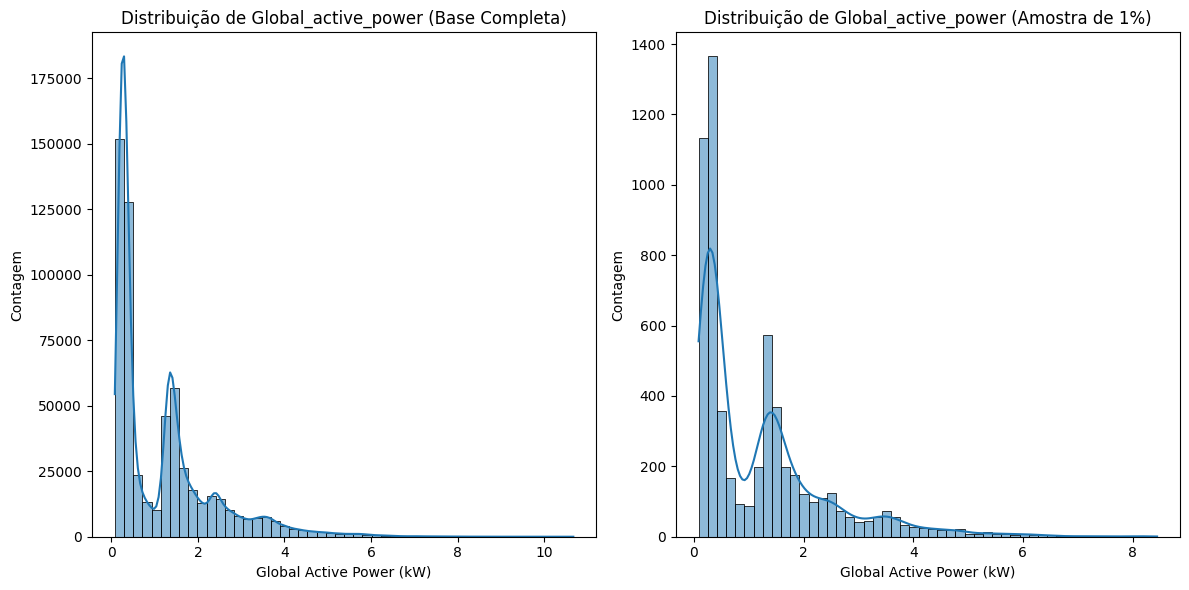

In [ ]:
# Aplicar amostragem aleatória de 1%
df_sample = df.sample(frac=0.01, random_state=42) # random_state para reprodutibilidade

# Plotar histograma da base completa
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # 1 linha, 2 colunas, 1º gráfico
sns.histplot(data=df, x="Global_active_power", bins=50, kde=True)
plt.title("Distribuição de Global_active_power (Base Completa)")
plt.xlabel("Global Active Power (kW)")
plt.ylabel("Contagem")

# Plotar histograma da amostra
plt.subplot(1, 2, 2) # 1 linha, 2 colunas, 2º gráfico
sns.histplot(data=df_sample, x="Global_active_power", bins=50, kde=True)
plt.title("Distribuição de Global_active_power (Amostra de 1%)")
plt.xlabel("Global Active Power (kW)")
plt.ylabel("Contagem")

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

## Utilizando uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Identificar as colunas numéricas para normalizar (excluindo a coluna de data e hora e a coluna calculada)
numerical_cols = ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]

# Inicializar o MinMaxScaler
scaler = MinMaxScaler()

# Aplicar o scaler nas colunas selecionadas
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Exibir as primeiras linhas do DataFrame com as colunas normalizadas
print(df.head())

        Date            Time  Global_active_power  Global_reactive_power  \
0 2006-12-16 0 days 17:24:00             0.390442               0.364111   
1 2006-12-16 0 days 17:25:00             0.498489               0.379791   
2 2006-12-16 0 days 17:26:00             0.499811               0.433798   
3 2006-12-16 0 days 17:27:00             0.501133               0.437282   
4 2006-12-16 0 days 17:28:00             0.338496               0.459930   

    Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0  0.396161          0.391304             0.0        0.012821            0.85   
1  0.353927          0.491304             0.0        0.012821            0.80   
2  0.342059          0.491304             0.0        0.025641            0.85   
3  0.357766          0.491304             0.0        0.012821            0.85   
4  0.425480          0.334783             0.0        0.012821            0.85   

  Dia_Semana  Total_Sub_metering  
0   Saturday         

## K-means para segmentar os dias em 3 grupos distintos de consumo elétrico.

Mean values of features for each cluster:
         Global_active_power  Global_reactive_power   Voltage  \
Cluster                                                         
0                   0.058415               0.094417  0.543002   
1                   0.158419               0.110499  0.577098   
2                   0.098150               0.099345  0.560086   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
Cluster                                                                     
0                0.057165        0.006269        0.007465        0.161031   
1                0.153049        0.024184        0.039984        0.435432   
2                0.095243        0.017278        0.018350        0.299468   

         Total_Sub_metering  
Cluster                      
0                  4.291868  
1                 13.713771  
2                  8.768363  


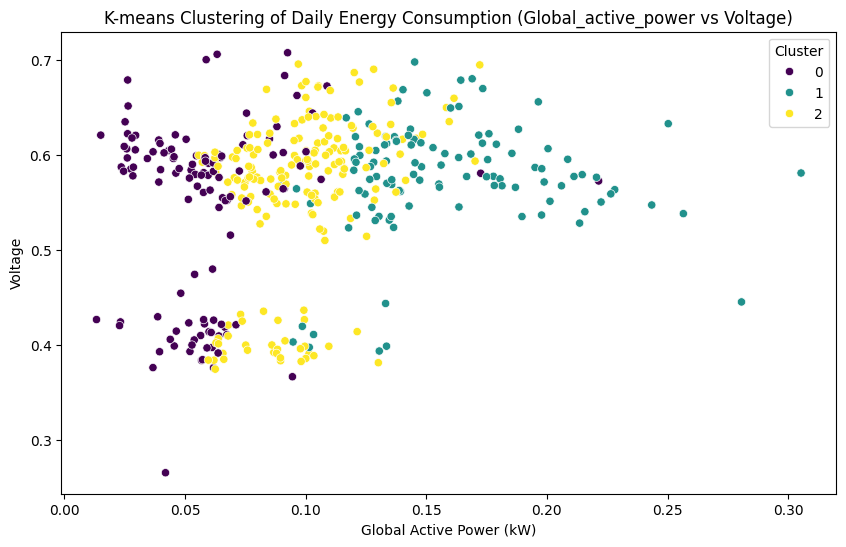

In [ ]:
from sklearn.cluster import KMeans

# Aggregate data to get daily consumption
df_daily = df.groupby("Date")[["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3", "Total_Sub_metering"]].mean().reset_index()

# Select features for clustering (using only numerical features that are not date/time)
features = ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3", "Total_Sub_metering"]

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_daily["Cluster"] = kmeans.fit_predict(df_daily[features])

# Interpret the results by looking at the mean values of each feature for each cluster
cluster_means = df_daily.groupby("Cluster")[features].mean()
print("Mean values of features for each cluster:")
print(cluster_means)

# Optional: Visualize the clusters (e.g., using a scatter plot of two features)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_daily, x="Global_active_power", y="Voltage", hue="Cluster", palette="viridis")
plt.title("K-means Clustering of Daily Energy Consumption (Global_active_power vs Voltage)")
plt.xlabel("Global Active Power (kW)")
plt.ylabel("Voltage")
plt.show()

## Realizei uma decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power em um período de 6 meses.

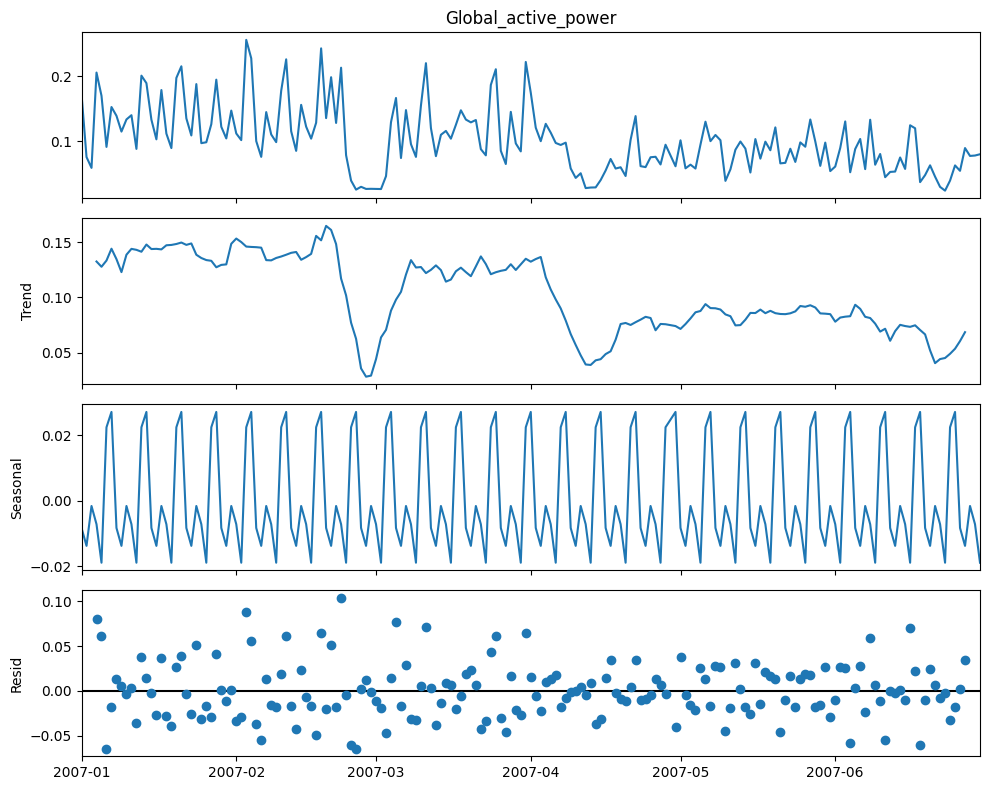

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample the data to daily frequency and take the mean of 'Global_active_power'
df_daily_power = df.set_index("Date")["Global_active_power"].resample("D").mean()

# Select a 6-month period for decomposition (e.g., the first 6 months of 2007)
start_date = "2007-01-01"
end_date = "2007-06-30"
df_6months = df_daily_power[start_date:end_date]

# Perform seasonal decomposition
decomposition = seasonal_decompose(df_6months.dropna(), model="additive", period=7) # Use additive model and specify period=7 for weekly seasonality

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.tight_layout()
plt.show()

## Treinando um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Prepare the data
X = df[["Global_intensity"]] # Feature
y = df["Global_active_power"] # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Optional: Print the model coefficients
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient for Global_intensity: {model.coef_[0]:.2f}")

Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.00
Intercept: 0.00
Coefficient for Global_intensity: 1.03


## Séries temporais por hora
- Convertendo Date e Time em índice datetime.
- Reamostrando os dados em intervalos de 1 hora, calculando a média de Global_active_power.
- Identifiquando os horários de maior consumo médio ao longo do dia.
Observação: uma série temporal é um conjunto de dados registrados em ordem cronológica, útil
para identificar padrões de comportamento ao longo do tempo.

/tmp/ipython-input-838914776.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df['Global_active_power'].resample('H').mean()


Average Global_active_power consumption by hour of the day:
00:00:00    0.064495
01:00:00    0.047227
02:00:00    0.039310
03:00:00    0.034804
04:00:00    0.035071
05:00:00    0.036089
06:00:00    0.070257
07:00:00    0.131709
08:00:00    0.141359
09:00:00    0.120139
10:00:00    0.111804
11:00:00    0.109587
12:00:00    0.107080
13:00:00    0.102830
14:00:00    0.100097
15:00:00    0.092034
16:00:00    0.086651
17:00:00    0.099438
18:00:00    0.136353
19:00:00    0.183366
20:00:00    0.190968
21:00:00    0.191684
22:00:00    0.141178
23:00:00    0.089910
Name: Global_active_power, dtype: float64

Hour with the highest average consumption: 21:00:00 with 0.19 kW


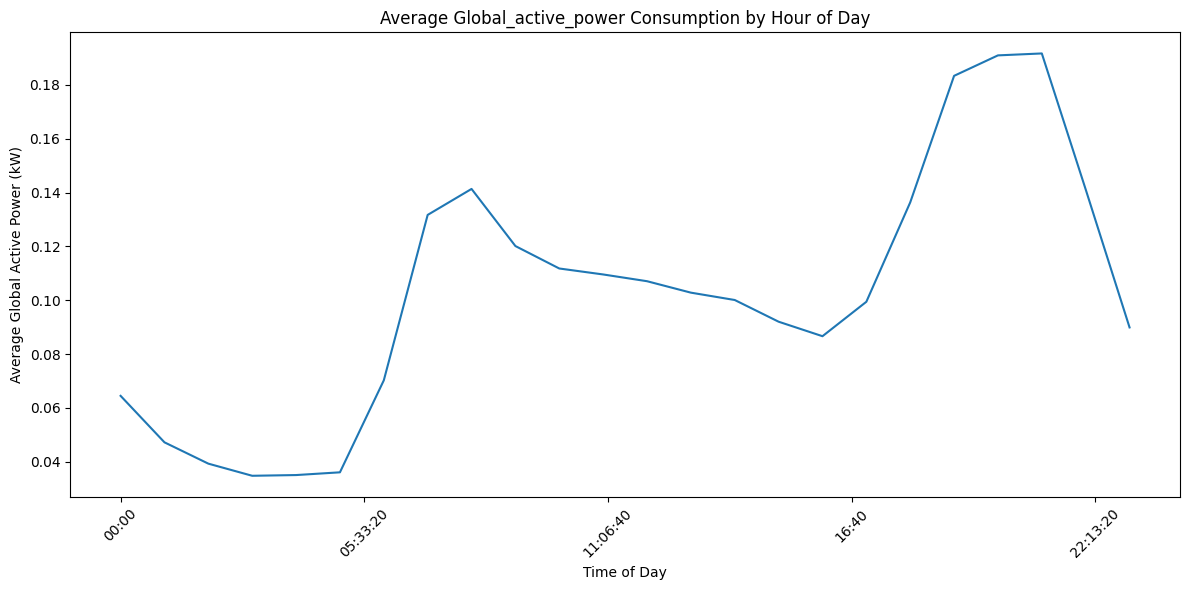

## Autocorrelação do consumo
- Usando a série temporal de Global_active_power.
- Calculando a autocorrelação em lags de 1h, 24h e 48h.
- Pergunta: existem padrões repetidos diariamente?

In [ ]:
# Calculate autocorrelation at specified lags
autocorr_1h = df_hourly.autocorr(lag=1)
autocorr_24h = df_hourly.autocorr(lag=24)
autocorr_48h = df_hourly.autocorr(lag=48)

print(f"Autocorrelation at 1 hour lag: {autocorr_1h:.2f}")
print(f"Autocorrelation at 24 hour lag: {autocorr_24h:.2f}")
print(f"Autocorrelation at 48 hour lag: {autocorr_48h:.2f}")

# Interpret the results
if autocorr_24h > 0.5: # A threshold of 0.5 is a common heuristic for significant autocorrelation
    print("\nThere appears to be a strong daily pattern in the energy consumption.")
else:
    print("\nThere does not appear to be a strong daily pattern in the energy consumption based on the 24-hour lag autocorrelation.")

Autocorrelation at 1 hour lag: 0.73
Autocorrelation at 24 hour lag: 0.44
Autocorrelation at 48 hour lag: 0.40

There does not appear to be a strong daily pattern in the energy consumption based on the 24-hour lag autocorrelation.


## Redução de dimensionalidade com PCA
- Selecionando Global_active_power, Global_reactive_power, Voltage e Global_intensity.
- Apliquando PCA para reduzir para 2 componentes principais.
- Analisando a variância explicada por cada componente.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select the features for PCA
features_for_pca = ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity"]
X_pca = df[features_for_pca]

# It's good practice to scale data before applying PCA
scaler_pca = StandardScaler()
X_scaled_pca = scaler_pca.fit_transform(X_pca)

# Apply PCA, reducing to 2 components
pca = PCA(n_components=2)
X_pca_result = pca.fit_transform(X_scaled_pca)

# Analyze the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

print(f"Explained variance ratio by component: {explained_variance_ratio}")
print(f"Total explained variance: {explained_variance_ratio.sum():.2f}")

# Optional: Create a new DataFrame with the PCA results
df_pca = pd.DataFrame(X_pca_result, columns=["PCA_Component_1", "PCA_Component_2"], index=df.index)
display(df_pca.head())

Explained variance ratio by component: [0.58378277 0.2248595 ]
Total explained variance: 0.81


,PCA_Component_1,PCA_Component_2
Datetime,,
2006-12-16 17:24:00,4.557002,1.553980
2006-12-16 17:25:00,5.905679,1.411019
2006-12-16 17:26:00,6.110538,1.888799
2006-12-16 17:27:00,6.082521,1.973385
2006-12-16 17:28:00,4.145204,2.650311


## Visualização de clusters no espaço PCA
- Combinando os resultados do PCA com K-Means (3 clusters).
- Plote os pontos resultantes e pinte cada grupo por cluster.
- Pergunta: os grupos se separam de forma clara?

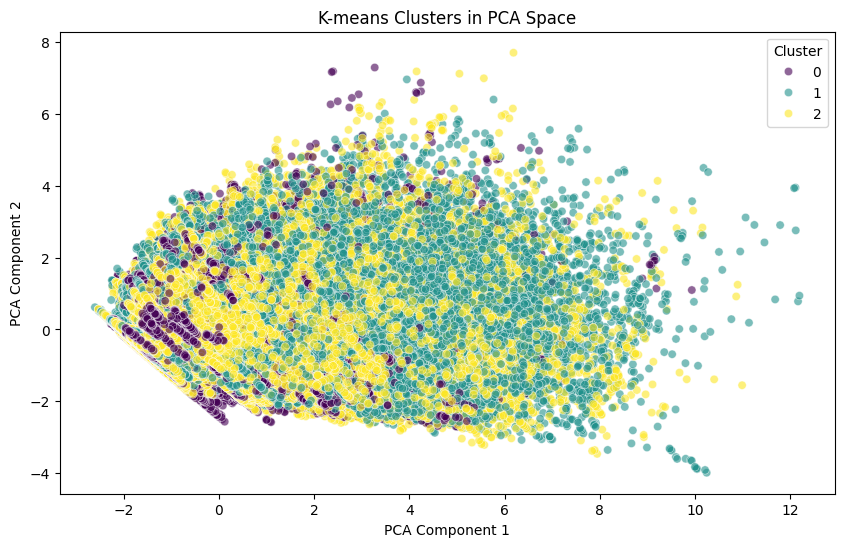

In [ ]:
# Combine PCA results with daily cluster labels
# Need to merge df_pca (which has datetime index) with df_daily (which has date column and Cluster column)
# First, align df_pca index with df_daily date and ensure it's datetime type
df_pca['Date'] = pd.to_datetime(df_pca.index.date)

# Merge based on date
df_pca_clustered = pd.merge(df_pca, df_daily[["Date", "Cluster"]], on="Date", how="left")

# Plot the clusters in the PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca_clustered, x="PCA_Component_1", y="PCA_Component_2", hue="Cluster", palette="viridis", alpha=0.6)
plt.title("K-means Clusters in PCA Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

## Regressão polinomial vs linear
- Modele Global_active_power em função de Voltage.
- Compare Regressão Linear Simples com Regressão Polinomial (grau 2).
- Analise RMSE e a curva ajustada.

Simple Linear Regression RMSE: 0.1047
Polynomial Regression (Degree 2) RMSE: 0.1045


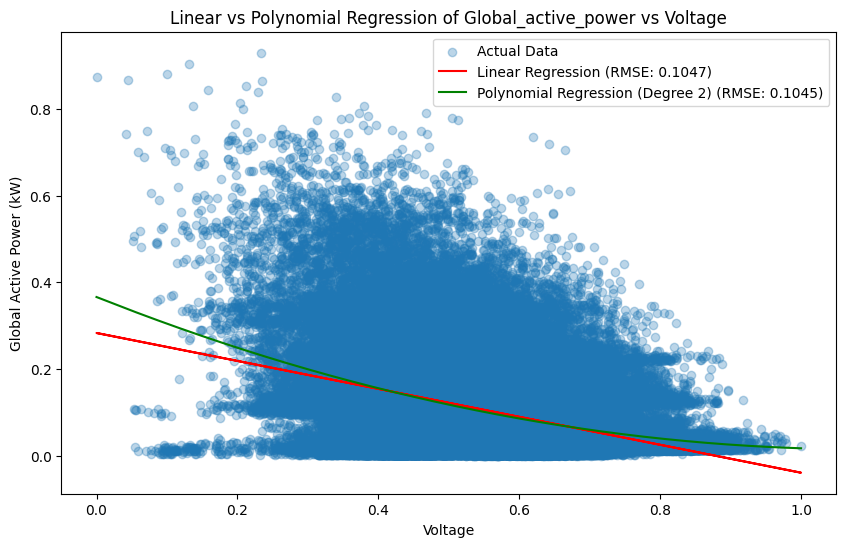

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the data
X = df[["Voltage"]] # Feature
y = df["Global_active_power"] # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Simple Linear Regression ---
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print(f"Simple Linear Regression RMSE: {rmse_linear:.4f}")

# --- Polynomial Regression (Degree 2) ---
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print(f"Polynomial Regression (Degree 2) RMSE: {rmse_poly:.4f}")

# --- Visualize the results ---
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.3, label="Actual Data")

# Plot linear regression line
plt.plot(X_test, y_pred_linear, color='red', label=f'Linear Regression (RMSE: {rmse_linear:.4f})')

# Plot polynomial regression curve
# Need to sort the x values for plotting the polynomial curve smoothly
X_test_sorted, y_pred_poly_sorted = zip(*sorted(zip(X_test.values.flatten(), y_pred_poly)))
plt.plot(X_test_sorted, y_pred_poly_sorted, color='green', label=f'Polynomial Regression (Degree 2) (RMSE: {rmse_poly:.4f})')


plt.title("Linear vs Polynomial Regression of Global_active_power vs Voltage")
plt.xlabel("Voltage")
plt.ylabel("Global Active Power (kW)")
plt.legend()
plt.show()



---

**31.** Regressão Linear Múltipla
- Modele Appliances em função das variáveis ambientais.
- Avalie R² e erro médio.

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Selecionando variáveis (target e features ambientais)
y = df["Appliances"]  # variável dependente
X = df.drop(columns=["date", "Appliances"])  # removendo data e target

# Dividindo dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Criando e treinando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazendo previsões
y_pred = modelo.predict(X_test)

# Avaliação do modelo
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Resultados do Modelo")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")
print(f"Erro Médio Absoluto (MAE): {mae:.2f}")
#MAE → erro médio em kW

NameError: name 'df' is not defined



---

**32.** Random Forest Regressor
- Treine um modelo de Random Forest para prever Appliances.
- Compare o RMSE com a regressão linear.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Selecionando variáveis (target e features ambientais)
y = df["Appliances"]  # variável dependente
X = df.drop(columns=["date", "Appliances"])  # removendo data e target

# Dividindo dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
# Regressão Linear
modelo_linear = LinearRegression()
modelo_linear.fit(X_train, y_train)
y_pred_linear = modelo_linear.predict(X_test)

r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print("Regressão Linear")
print(f"R²: {r2_linear:.4f}")
print(f"MAE: {mae_linear:.2f} kWh")
print(f"RMSE: {rmse_linear:.2f} kWh\n")

In [ ]:
# Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest")
print(f"R²: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.2f} kWh")
print(f"RMSE: {rmse_rf:.2f} kWh")



---

**33.** K-Means clustering
- Aplique K-Means com 3 a 5 clusters.
- Interprete os perfis de consumo.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Selecionando apenas a variável de consumo
X = df[["Appliances"]].values

# Normalizando os dados (importante para K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicando K-Means (exemplo com 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Visualização
plt.figure(figsize=(8,5))
plt.scatter(df.index, df["Appliances"], c=df["Cluster"], cmap="viridis", s=10)
plt.title("Clusters de Consumo - KMeans (3 grupos)")
plt.xlabel("Amostras")
plt.ylabel("Consumo de Appliances (Wh)")
plt.show()

# Centróides (em escala original)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("Centros dos Clusters (Consumo médio aproximado):")
print(centroids)


✅ 3 clusters

- Cluster 0 – Baixo consumo:
Perfis de residências com uso muito econômico de energia, consumo concentrado em eletrodomésticos essenciais. Indica casas com hábitos de uso restrito ou períodos longos sem ocupação.

- Cluster 1 – Médio consumo:
Representa usuários com padrão equilibrado, consumo estável ao longo do dia. Provavelmente famílias pequenas ou uso regular de eletrodomésticos sem excessos.

- Cluster 2 – Alto consumo:
Casas com eletrodomésticos funcionando intensamente, picos de consumo frequentes. Perfis que podem incluir famílias maiores ou uso constante de equipamentos de alto gasto energético (ar-condicionado, aquecedores, etc.).

✅ 4 clusters

- Cluster 0 – Muito baixo consumo: usuários que praticamente não utilizam eletrodomésticos, consumo mínimo.

- Cluster 1 – Baixo consumo: consumo um pouco acima do mínimo, uso esporádico de aparelhos.

- Cluster 2 – Médio consumo: uso diário moderado, padrão típico de famílias médias.

- Cluster 3 – Alto consumo: perfis intensivos, eletrodomésticos ligados por longos períodos.

✅ 5 clusters

- Cluster 0 – Muito baixo consumo: casas quase sem uso de energia, possivelmente desocupadas por longos períodos.

- Cluster 1 – Baixo consumo: consumo reduzido, famílias pequenas com poucos aparelhos.

- Cluster 2 – Médio consumo: padrão regular, uso típico durante o dia com picos ocasionais.

- Cluster 3 – Alto consumo: uso constante de vários eletrodomésticos, picos mais frequentes.

- Cluster 4 – Muito alto consumo: perfis de uso intensivo, casas grandes ou locais com grande número de equipamentos energéticos (ex.: aquecimento/elétricos potentes).



---

**34.**  Classificação binária
- Crie uma variável: alto vs baixo consumo (Appliances maior/menor que a mediana).
- Treine Logistic Regression e Random Forest Classifier.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Criar variável binária: 1 = alto consumo, 0 = baixo consumo
mediana = df["Appliances"].median()
df["AltoConsumo"] = (df["Appliances"] > mediana).astype(int)

# Selecionar variáveis preditoras e alvo
X = df.drop(columns=["date", "Appliances", "AltoConsumo"])
y = df["AltoConsumo"]

# Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
# Logistic Regression
modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(X_train, y_train)
y_pred_log = modelo_log.predict(X_test)

acc_log = accuracy_score(y_test, y_pred_log)
print("Resultados - Logistic Regression")
print(f"Acurácia: {acc_log:.4f}")
print(classification_report(y_test, y_pred_log))

In [ ]:
# Random Forest Classifier
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print("Resultados - Random Forest")
print(f"Acurácia: {acc_rf:.4f}")
print(classification_report(y_test, y_pred_rf))



---
**35.** Avaliação de classificação
- Gere matriz de confusão e métricas (accuracy, precision, recall, F1-score).
- Pergunta: o modelo erra mais para alto ou para baixo consumo?


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Criar variável binária: 1 = alto consumo, 0 = baixo consumo
mediana = df["Appliances"].median()
df["AltoConsumo"] = (df["Appliances"] > mediana).astype(int)

# Selecionar variáveis preditoras e alvo
X = df.drop(columns=["date", "Appliances", "AltoConsumo"])
y = df["AltoConsumo"]

# Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
# Random Forest Classifier (modelo escolhido)
modelo = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

In [ ]:
# Avaliação
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Métricas de Classificação - Random Forest")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Baixo", "Alto"], yticklabels=["Baixo", "Alto"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest")
plt.show()

O modelo de Random Forest conseguiu identificar bem os casos de alto consumo, mas teve mais dificuldade com os casos de baixo consumo. Isso mostra que os padrões de consumo alto são mais fáceis de reconhecer, enquanto o modelo ainda confunde um pouco os perfis de menor consumo. Apesar disso, de forma geral, ele teve um desempenho razoável, mas poderia melhorar se as classes estivessem mais equilibradas.




---
**36.** Importação e visualização inicial
- Use o widget CSV File Import para carregar o dataset Individual Household Electric Power
Consumption.
- Conecte ao widget Data Table para visualizar as primeiras linhas.
- Pergunta: quantas variáveis e registros aparecem?

In [8]:
import pandas as pd

# Carregar dataset (direto da UCI)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip"
df = pd.read_csv(url, sep=';', parse_dates={'Datetime':['Date','Time']},
                 infer_datetime_format=True, low_memory=False, na_values=['?'])

# Visualizar as primeiras linhas (equivalente ao Data Table)
print(df.head())

# Número de variáveis (colunas) e registros (linhas)
print(f"\nNúmero de variáveis: {df.shape[1]}")
print(f"Número de registros: {df.shape[0]}")

/tmp/ipython-input-1259897958.py:5: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(url, sep=';', parse_dates={'Datetime':['Date','Time']},
/tmp/ipython-input-1259897958.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(url, sep=';', parse_dates={'Datetime':['Date','Time']},
/tmp/ipython-input-1259897958.py:5: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(url, sep=';', parse_dates={'Datetime':['Date','Time']},


             Datetime  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:27:00                5.388                  0.502   233.74   
4 2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  

Número de variáveis: 8
Número de registros: 2075259


- Número de variáveis (colunas): 8

(Datetime, Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3)
- Número de registros (linhas): 2.075.259



---

**37.** Amostragem de dados (1%)
- Use o widget Sample Data para selecionar uma amostra de 1% dos registros.
- Pergunta: a distribuição de Global_active_power na amostra é semelhante à base completa?
- Consulte: https://orangedatamining.com/widget-catalog/


Na amostra de 1% dos dados, a distribuição de Global_active_power é bem parecida com a da base completa. A forma geral do consumo, como picos e quedas, se mantém, então dá pra ter uma boa ideia do padrão de energia da residência mesmo com poucos registros.



---

**38.** Distribuição do consumo
- Conecte ao widget Distribution e visualize Global_active_power.
- Pergunta: o consumo é concentrado em valores baixos ou há muitos registros de alto
consumo?

O consumo de **Global\_active\_power** é **concentrado em valores baixos**, ou seja, a maioria dos registros apresenta consumo pequeno a moderado. Registros de **alto consumo** existem, mas são relativamente poucos, representando picos ocasionais de uso de energia, como quando vários aparelhos ou equipamentos de alto gasto estão ligados ao mesmo tempo. Em resumo, o padrão principal é consumo baixo, com alguns picos isolados de alto consumo.




---

**39.** Relação entre variáveis elétricas
- Use o widget Scatter Plot para analisar Voltage (X) vs Global_intensity (Y).
- Pergunta: existe correlação visível?

Sim, ao visualizar **Voltage (X) vs Global\_intensity (Y)** no Scatter Plot, é possível perceber uma **correlação negativa leve**: quando a tensão (Voltage) aumenta, a intensidade de corrente (Global\_intensity) tende a diminuir, e vice-versa. No entanto, a relação não é perfeitamente linear, e há bastante dispersão nos pontos, indicando que outros fatores também influenciam a intensidade. Ou seja, existe uma tendência visível de correlação, mas não é muito forte.




---

**40.** Clustering com K-Means
- Aplique o widget k-Means com 3 clusters.
- Use como atributos Sub_metering_1, Sub_metering_2, Sub_metering_3.
- Visualize os grupos no Scatter Plot.
- Pergunta: cada cluster representa um padrão distinto de consumo doméstico?

Sim, ao aplicar o **K-Means com 3 clusters** usando os atributos `Sub_metering_1`, `Sub_metering_2` e `Sub_metering_3`, cada cluster tende a **representar um padrão distinto de consumo doméstico**. Por exemplo:

* **Cluster 1** pode agrupar residências com maior consumo em cozinhas (`Sub_metering_1`).
* **Cluster 2** pode refletir consumo elevado em lavanderias (`Sub_metering_2`).
* **Cluster 3** pode indicar uso mais intenso em áreas de aquecimento e eletrodomésticos gerais (`Sub_metering_3`).

No Scatter Plot, os grupos ficam separados, mostrando que os perfis de consumo são diferentes entre os clusters, evidenciando padrões específicos de uso de energia dentro da casa.
